<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK3_wCodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise (Solution)

We are going to use the USA_Housing dataset for this regression problem.

Reference: https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm/notebook

Data: https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/USA_Housing.csv

We will build an univariate linear regression model that will predict the house price in USA.

The steps are:

1. Load Explore and Prepare Dataset
2. Assess Baseline
3. Train LinearRegression Model
4. Train Lasso Model with all Features
5. Train Ridge Model with all Features
6. Train Elastinet Model with all Features

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [2]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/main/USA_Housing.csv"

**[1.3]** Load the data into a DataFrame called df

In [3]:
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of df

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**[1.5]** Display the summary (info) of df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
#Using dataframe df: check null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

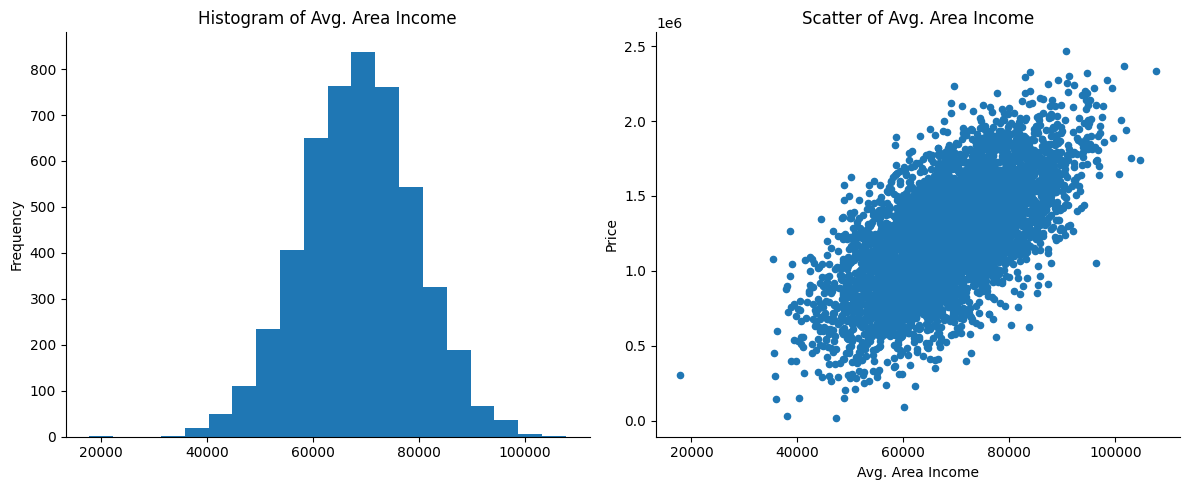

In [8]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Avg. Area Income'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Avg. Area Income')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Avg. Area Income', y='Price', kind='scatter', ax=axes[1], title='Scatter of Avg. Area Income')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

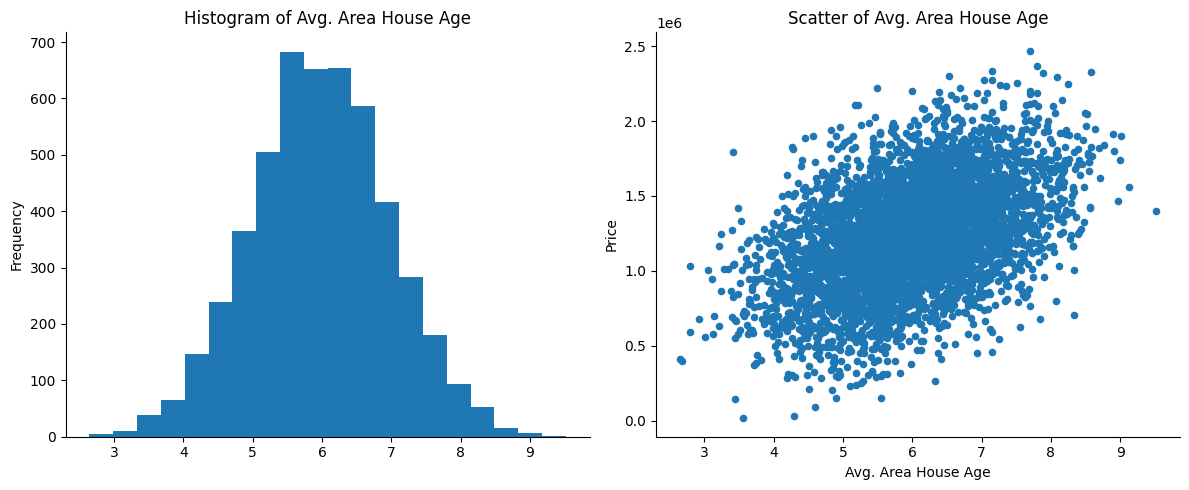

In [9]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Avg. Area House Age'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Avg. Area House Age')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Avg. Area House Age', y='Price', kind='scatter', ax=axes[1], title='Scatter of Avg. Area House Age')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

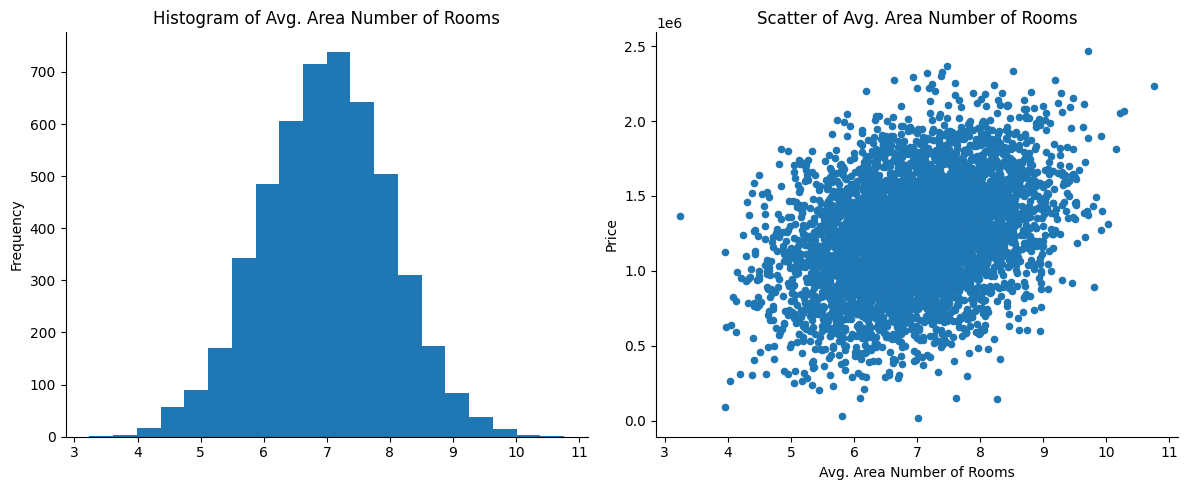

In [10]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Avg. Area Number of Rooms'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Avg. Area Number of Rooms')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Avg. Area Number of Rooms', y='Price', kind='scatter', ax=axes[1], title='Scatter of Avg. Area Number of Rooms')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

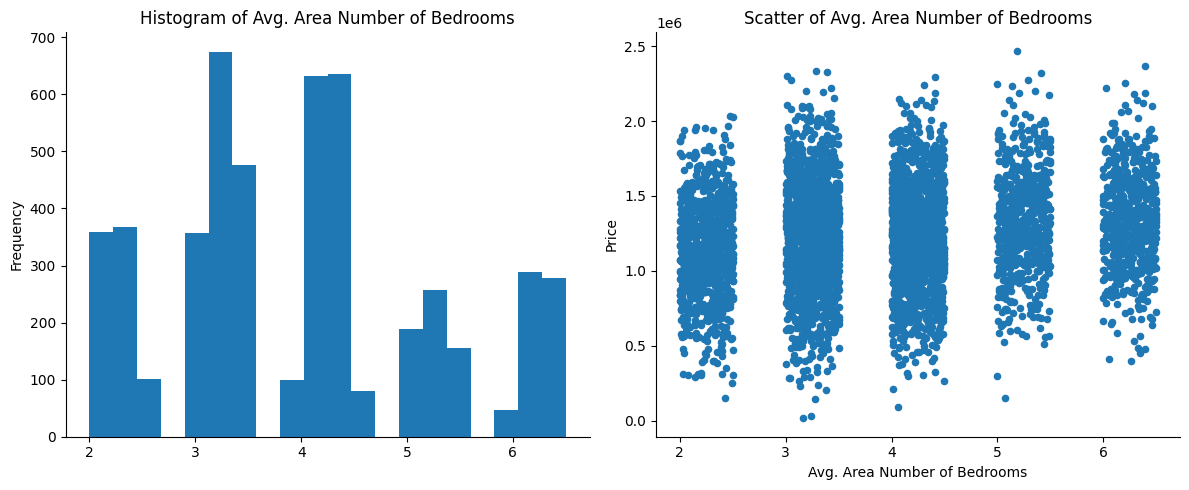

In [11]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Avg. Area Number of Bedrooms'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Avg. Area Number of Bedrooms')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Avg. Area Number of Bedrooms', y='Price', kind='scatter', ax=axes[1], title='Scatter of Avg. Area Number of Bedrooms')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

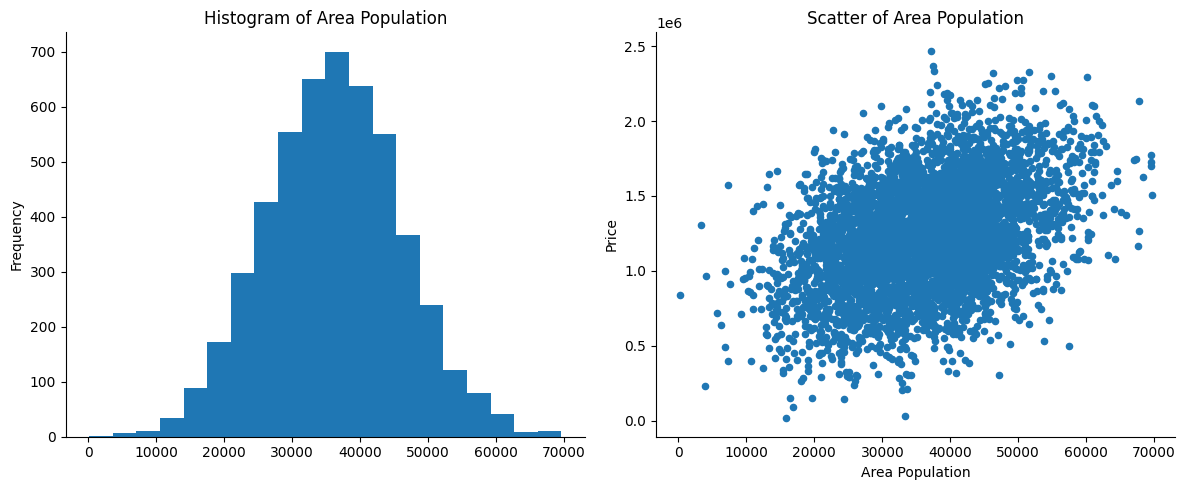

In [12]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram on the first subplot
df['Area Population'].plot(kind='hist', bins=20, ax=axes[0], title='Histogram of Area Population')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot scatter plot on the second subplot
df.plot(x='Area Population', y='Price', kind='scatter', ax=axes[1], title='Scatter of Area Population')
axes[1].spines[['top', 'right']].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Prepare data training set (X) and target (y) for traning the model

In [13]:
y = df['Price']
X = df.loc[:, ~df.columns.isin(['Price', 'Address'])]

In [14]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


#2. Assess Baseline

**[2.1]** Calculate the mean of the target variable (Price)

In [15]:
y_mean = y.mean()

**[2.2]** Create a numpy array called y_base filled with this value

In [16]:
y_base = np.full(y.shape, y_mean)

**[2.3]** Import the MSE and MAE from sklearn and calculate the RMSE and MAE between the target variable and the average value

In [17]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [18]:
rmse_value = mse(y, y_base, squared=False)
mae_value = mae(y, y_base)

print("RMSE: ", rmse_value)
print("MAE:  ", mae_value)

RMSE:  353082.3130526381
MAE:   282275.20709891006


#3. Train LinearRegression Model


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [19]:
from sklearn.linear_model import LinearRegression

**[3.2]** Create a LinearRegression object called lr and fit (X, y)

In [20]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

**[3.3]** Print the intercept and coefficient of the lr model

In [21]:
print(f"Intercept: {lr.intercept_}")

lr_coef_toList = lr.coef_.tolist()

for i, j in zip(X.columns, lr_coef_toList):
  print(f"Coefficient of {i}: {j}")

Intercept: -2637299.033328584
Coefficient of Avg. Area Income: 21.578049448349464
Coefficient of Avg. Area House Age: 165637.02694087147
Coefficient of Avg. Area Number of Rooms: 120659.94881629433
Coefficient of Avg. Area Number of Bedrooms: 1651.1390540282678
Coefficient of Area Population: 15.200743923749542


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [22]:
y_preds = lr.predict(X)

In [23]:
# Calculate RMSE and MAE
rmse2_value = mse(y, y_preds, squared=False)
mae2_value = mae(y, y_preds)

# Print the results
print("RMSE: ", rmse2_value)
print("MAE:  ", mae2_value)

RMSE:  101092.70158252279
MAE:   81359.27022837057


#4. Train Lasso Model with all Features


**[4.1]** Import the Lasso model from sklearn.linear_model

In [25]:
from sklearn.linear_model import Lasso

**[4.2]** Create a LinearRegression object called lr and fit (X, y)

In [31]:
ls = Lasso(alpha=1.0)
ls.fit(X, y)

Lasso()

**[4.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [32]:
y_preds_ls = ls.predict(X)

In [33]:
# Calculate RMSE and MAE
rmse3_value = mse(y, y_preds_ls, squared=False)
mae3_value = mae(y, y_preds_ls)

# Print the results
print("RMSE: ", rmse3_value)
print("MAE:  ", mae3_value)

RMSE:  101092.70159325718
MAE:   81359.27682122953


#5. Train Ridge Model with all Features


**[5.1]** Import the Ridge model from sklearn.linear_model

In [34]:
from sklearn.linear_model import Ridge

**[5.2]** Create a LinearRegression object called lr and fit (X, y)

In [35]:
rd = Ridge(alpha=1.0)
rd.fit(X, y)

Ridge()

**[5.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [37]:
y_preds_rd = rd.predict(X)

In [38]:
# Calculate RMSE and MAE
rmse4_value = mse(y, y_preds_rd, squared=False)
mae4_value = mae(y, y_preds_rd)

# Print the results
print("RMSE: ", rmse4_value)
print("MAE:  ", mae4_value)

RMSE:  101092.71081461906
MAE:   81359.78947371984


#6. Train ElasticNet Model with all Features


**[5.1]** Import the ElasticNet model from sklearn.linear_model

In [40]:
from sklearn.linear_model import ElasticNet

**[5.2]** Create a ElasticNet object called lr and fit (X, y)

In [39]:
en = ElasticNet(alpha=1.0)
en.fit(X, y)

ElasticNet()

**[5.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [41]:
y_preds_en = en.predict(X)

In [42]:
# Calculate RMSE and MAE
rmse5_value = mse(y, y_preds_en, squared=False)
mae5_value = mae(y, y_preds_en)

# Print the results
print("RMSE: ", rmse5_value)
print("MAE:  ", mae5_value)

RMSE:  122101.45509802915
MAE:   98277.55489596257


#Create a comparison chart

In [44]:
import altair as alt

In [66]:
import altair as alt
import pandas as pd

# Assuming you have imported Altair and defined y, y_preds, y_preds_ls, y_preds_rd, y_preds_en

# Sample fraction (adjust as needed)
sample_fraction = 0.01  # Change this to the desired fraction

# Sample dataframes
y_sampled = pd.DataFrame({'target': y, 'preds': y})
y_preds_sampled = pd.DataFrame({'target': y, 'preds': y_preds}).sample(frac=sample_fraction)
y_preds_ls_sampled = pd.DataFrame({'target': y, 'preds': y_preds_ls}).sample(frac=sample_fraction)
y_preds_rd_sampled = pd.DataFrame({'target': y, 'preds': y_preds_rd}).sample(frac=sample_fraction)
y_preds_en_sampled = pd.DataFrame({'target': y, 'preds': y_preds_en}).sample(frac=sample_fraction)

# Scatter plot for perfect prediction (green points)
perfect = alt.Chart(y_sampled).mark_line(color='green').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values
lr_chart = alt.Chart(y_preds_sampled).mark_line().encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Least Squares)
ls_chart = alt.Chart(y_preds_ls_sampled).mark_line(color='red').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Ridge Regression)
rd_chart = alt.Chart(y_preds_rd_sampled).mark_line(color='orange').encode(
    x='target',
    y='preds'
)

# Scatter plot for predicted values (Elastic Net)
en_chart = alt.Chart(y_preds_en_sampled).mark_line(color='grey').encode(
    x='target',
    y='preds'
)

# Display the charts
perfect + lr_chart + ls_chart + rd_chart + en_chart


alt.LayerChart(...)